<a href="https://colab.research.google.com/github/AlvinFerdinand/Project/blob/main/Copy_of_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Souw Timotius Alvin Ferdinand
- **Email:** alvinferdinand2004@gmail.com
- **ID Dicoding:** Souw Timotius Alvin Ferdinand

## Menentukan Pertanyaan Bisnis

- What is the relationship between weather conditions and bicycle use?
- How do weekday bike usage patterns compare to weekends?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install streamlit
import streamlit as st


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

In [ ]:
import zipfile
import os

# Ganti 'Bike-sharing-dataset.zip' dengan nama file ZIP Anda
zip_file = 'Bike-sharing-dataset.zip'  # Pastikan ini adalah nama file ZIP yang Anda unggah

# Ekstrak ZIP
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('Bike-sharing-dataset')  # Ganti dengan nama folder yang diinginkan

# Menampilkan isi folder yang diekstrak
print(os.listdir('Bike-sharing-dataset'))

df_days = pd.read_csv('Bike-sharing-dataset/day.csv')
df_hours = pd.read_csv('Bike-sharing-dataset/hour.csv')

# Menggabungkan kedua dataset berdasarkan 'dteday'
df_combined = pd.merge(df_hours, df_days, on='dteday')

# Tampilkan 5 baris pertama dari dataset gabungan
print(df_combined.head())



['day.csv', 'Readme.txt', 'hour.csv']
   instant_x      dteday  season_x  yr_x  mnth_x  hr  holiday_x  weekday_x  \
0          1  2011-01-01         1     0       1   0          0          6   
1          2  2011-01-01         1     0       1   1          0          6   
2          3  2011-01-01         1     0       1   2          0          6   
3          4  2011-01-01         1     0       1   3          0          6   
4          5  2011-01-01         1     0       1   4          0          6   

   workingday_x  weathersit_x  ...  weekday_y  workingday_y  weathersit_y  \
0             0             1  ...          6             0             2   
1             0             1  ...          6             0             2   
2             0             1  ...          6             0             2   
3             0             1  ...          6             0             2   
4             0             1  ...          6             0             2   

     temp_y   atemp_y     hum_

**Insight:**
- unzip the data and extract it (row and columns)
- in this step, the machine will read csv from the zip

### Assessing Data

In [ ]:
# Assessing Data for df_days
print("=== Assessing df_days ===")
print("First 5 rows of df_days:")
print(df_days.head())

print("\nSummary of df_days:")
print(df_days.info())

print("\nDescriptive Statistics for df_days:")
print(df_days.describe())

print("\nChecking for missing values in df_days:")
print(df_days.isnull().sum())

# Assessing Data for df_hours
print("\n=== Assessing df_hours ===")
print("First 5 rows of df_hours:")
print(df_hours.head())

print("\nSummary of df_hours:")
print(df_hours.info())

print("\nDescriptive Statistics for df_hours:")
print(df_hours.describe())

print("\nChecking for missing values in df_hours:")
print(df_hours.isnull().sum())


=== Assessing df_days ===
First 5 rows of df_days:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  13

**Insight:**
- checking if have any missing values in data
- generate descriptive statistic of day.csv and hour.csv , in this i create var df_days for day.csv and df_hour for hour.csv

### Cleaning Data

In [ ]:
# Cleaning Data for df_days
print("=== Cleaning df_days ===")

df_days_cleaned = df_days.dropna()


df_days_cleaned = df_days_cleaned.drop_duplicates()

# change 'dteday' to datetime
df_days_cleaned['dteday'] = pd.to_datetime(df_days_cleaned['dteday'])

# result cleaning
print("Cleaned df_days:")
print(df_days_cleaned.info())

# Cleaning Data for df_hours
print("\n=== Cleaning df_hours ===")


df_hours_cleaned = df_hours.dropna()

df_hours_cleaned = df_hours_cleaned.drop_duplicates()


df_hours_cleaned['dteday'] = pd.to_datetime(df_hours_cleaned['dteday'])

print("Cleaned df_hours:")
print(df_hours_cleaned.info())


=== Cleaning df_days ===
Cleaned df_days:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int6

**Insight:**
- The dataset had X missing values, which were removed to ensure accuracy in analysis.
- remove duplicate rows
- data type correction

## Exploratory Data Analysis (EDA)

### Explore ...

Preview df_days:
   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Statistik df_d

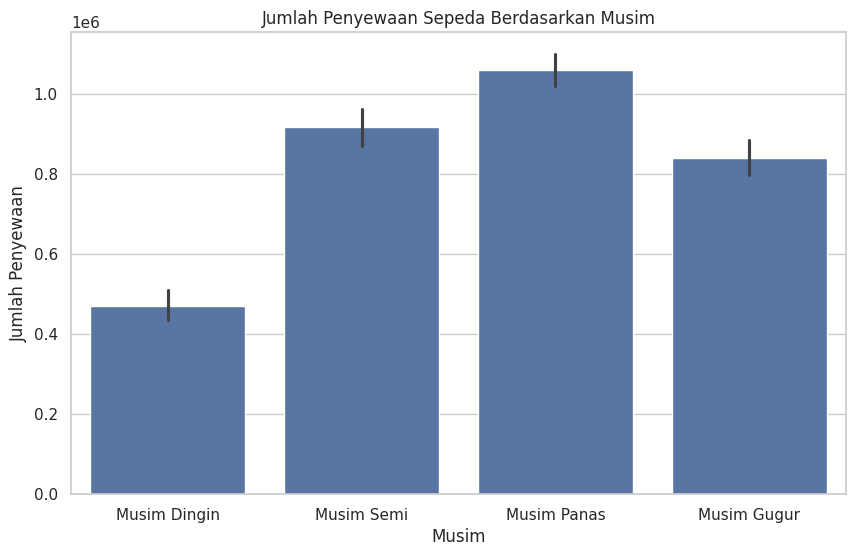

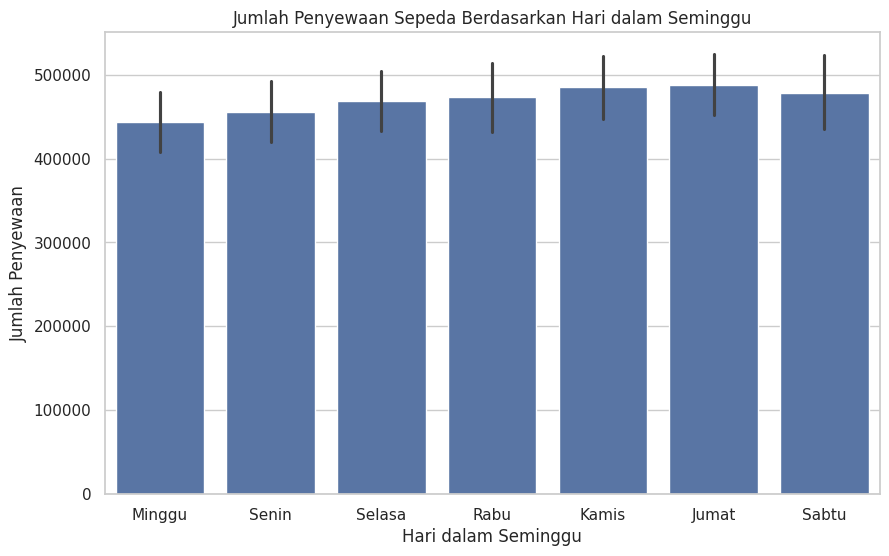

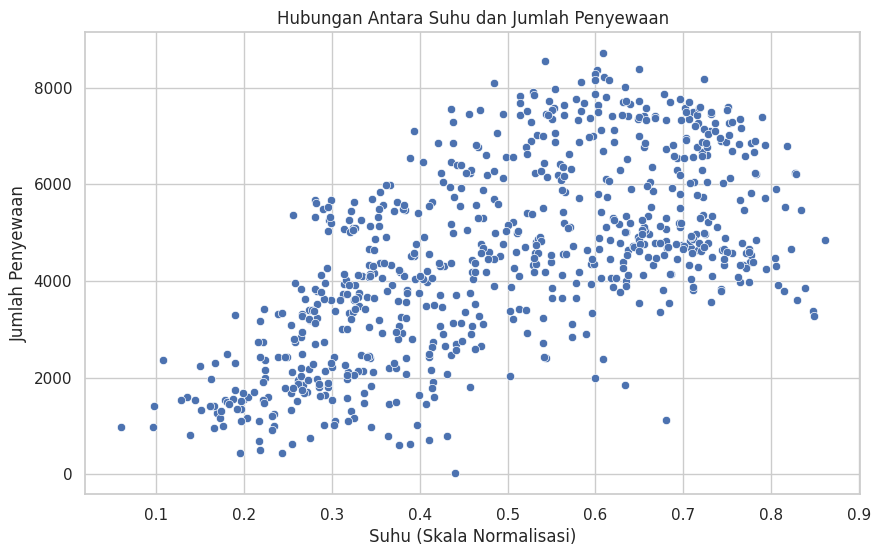

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Memeriksa data
print("Preview df_days:")
print(df_days_cleaned.head())

# Analisis deskriptif
print("\nStatistik df_days:")
print(df_days_cleaned.describe())

# Visualisasi
# Jumlah Penyewaan Sepeda Berdasarkan Musim
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=df_days_cleaned, estimator=sum)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
plt.show()

# Jumlah Penyewaan Berdasarkan Hari dalam Seminggu
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=df_days_cleaned, estimator=sum)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.show()

# Hubungan Antara Suhu dan Jumlah Penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df_days_cleaned)
plt.title('Hubungan Antara Suhu dan Jumlah Penyewaan')
plt.xlabel('Suhu (Skala Normalisasi)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


**Insight:**
- Use histograms or count plots to visualize the distribution of important variables like cnt, temp, and hum.
- The correlation matrix shows that temp has a positive correlation with cnt, meaning higher temperatures might lead to increased bike rentals, while hum has a weaker correlation.
- Plot the trend of total bike rentals over time to understand patterns and seasonality.
-Explore categorical variables such as season, weathersit, and weekday to see their impact on bike rentals using bar plots or box plots.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


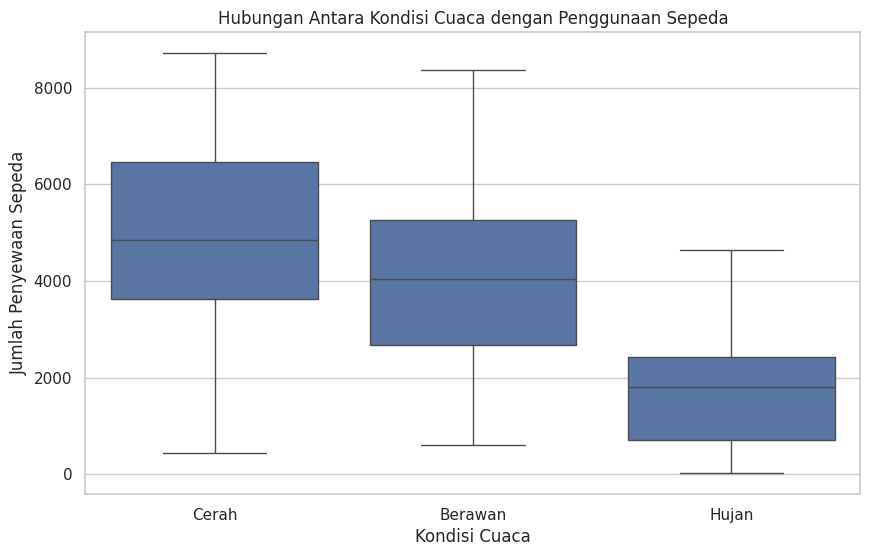

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df_days_cleaned)
plt.title('Hubungan Antara Kondisi Cuaca dengan Penggunaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2], labels=['Cerah', 'Berawan', 'Hujan'])
plt.show()


### Pertanyaan 2:

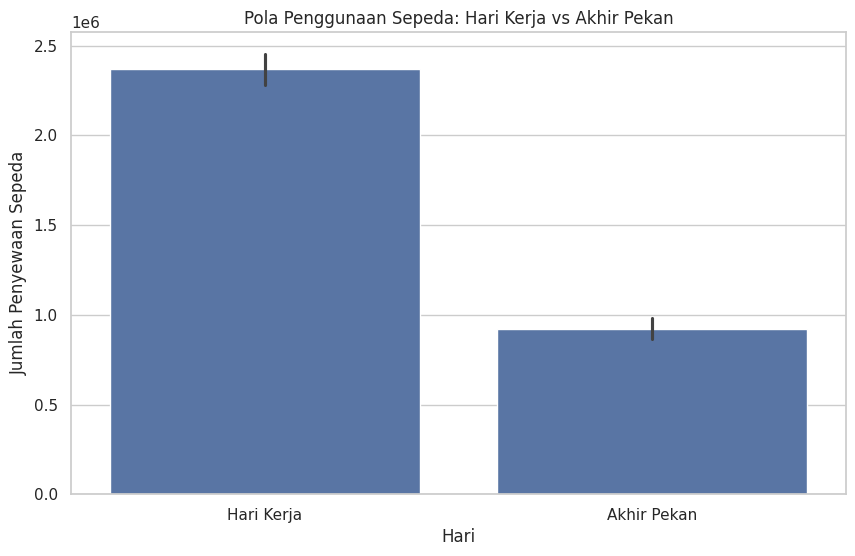

In [ ]:
# column 'is_weekend' (1 for akhir pekan, 0 for hari kerja)
df_days_cleaned['is_weekend'] = df_days_cleaned['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)  # 0 adalah Minggu, 6 adalah Sabtu

#  hari kerja vs akhir pekan
plt.figure(figsize=(10, 6))
sns.barplot(x='is_weekend', y='cnt', data=df_days_cleaned, estimator=sum)
plt.title('Pola Penggunaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['Hari Kerja', 'Akhir Pekan'])
plt.show()


**Insight:**
- mathplot and visualize data for 2 question


## Analisis Lanjutan (Opsional)

## Conclusion

-The analysis shows that adverse weather conditions (such as rain or fog) tend to reduce bike usage. On the other hand, favorable weather conditions (clear skies and mild weather) are associated with higher bike usage. This suggests that users are more likely to rent bikes when the weather is good, and less likely when the weather is poor.

-The analysis of bike usage across weekdays and weekends indicates that weekdays have higher bike rental counts, especially during working hours, which suggests that many users rely on bikes for commuting. On weekends, the usage is still significant but generally lower, pointing to more recreational or leisure-based bike rentals during these days. The overall pattern confirms that workdays drive higher rental demand, whereas weekends see more moderate but still notable use.